<a href="https://colab.research.google.com/github/Shamoo100/Lagos-Flood-Prediction/blob/main/flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The dataset includes various weather parameters for Lagos from 2002 to 2024. Here are some steps to analyze the data and build a predictive model for flooding events in Lagos:

**Data Cleaning and Preprocessing:**

-Handle missing values.

-Convert date columns to datetime format.

-Ensure numeric columns are in the correct format.

**Feature Engineering:**

-Create additional features if necessary, such as rolling averages or lag features.

-Encode categorical variables if any.

**Exploratory Data Analysis (EDA):**

-Visualize the distribution of key variables.

-Explore correlations between features and the target variable (flooding events).

-Identify any seasonal patterns or trends.


**Model Building:**

-Split the data into training and testing sets.

-Select appropriate models for time series prediction or classification (e.g., Logistic Regression, Random Forest, Gradient Boosting, etc.).

-Train and validate the models using cross-validation.

-Evaluate the models based on performance metrics (e.g., accuracy, precision, recall, F1 score).

**Model Evaluation and Selection:**

-Compare the performance of different models.

-Choose the best model based on evaluation metrics.

-Perform hyperparameter tuning to optimize the model.

**Prediction:**

-Use the trained model to predict future flooding events.

-Analyze the prediction results and their implications.

**Conclusion**
Conclude and deterimine a day based on the analysis carried out.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer



# Step 1: Data Cleaning and Preprocessing

Let's start with data cleaning and preprocessing.

In [9]:
#Data Dictionary

weather_data = {
    "Element": [
        "tempmax", "tempmin", "temp", "dew", "feelslike", "precip", "precipprob",
        "precipcover", "preciptype", "snow", "snowdepth", "windspeed", "windgust",
        "winddir", "visibility", "cloudcover", "humidity", "pressure",
        "solarradiation", "solarenergy", "uvindex", "severerisk", "sunrise",
        "sunset", "moonphase", "icon", "conditions", "description", "stations"
    ],
    "Description": [
        "Maximum Temperature", "Minimum Temperature", "Temperature (or mean temperature)",
        "Dew Point", "Feels like", "Precipitation", "Precipitation chance",
        "Precipitation cover", "Precipitation type", "Snow", "Snow depth",
        "Wind speed", "Wind gust", "Wind direction", "Visibility", "Cloud cover",
        "Relative humidity", "Sea level pressure", "Solar radiation",
        "Solar energy", "UV index", "Severe Risk", "Sunrise time", "Sunset time",
        "Moonphase", "A weather icon", "Short text about the weather",
        "Description of the weather for the day", "List of weather stations sources"
    ]
}

df = pd.DataFrame(weather_data)

# Display the DataFrame
print(df)


           Element                             Description
0          tempmax                     Maximum Temperature
1          tempmin                     Minimum Temperature
2             temp       Temperature (or mean temperature)
3              dew                               Dew Point
4        feelslike                              Feels like
5           precip                           Precipitation
6       precipprob                    Precipitation chance
7      precipcover                     Precipitation cover
8       preciptype                      Precipitation type
9             snow                                    Snow
10       snowdepth                              Snow depth
11       windspeed                              Wind speed
12        windgust                               Wind gust
13         winddir                          Wind direction
14      visibility                              Visibility
15      cloudcover                             Cloud cov

In [10]:
# Load dataset
lagos_weather_data = pd.read_csv('/content/drive/MyDrive/Lagos flood Prediction/lagos_weeather_data_2002_to_2024 (1) 1(lagos_weeather_data_2002_to_202).csv')

# Display the first few rows of the dataset
lagos_weather_data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,flooding event
0,Lagos,01/01/2002,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,2002-01-01 6:57:21,2002-01-01 18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,0.0
1,Lagos,02/01/2002,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,2002-01-02 6:57:46,2002-01-02 18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,0.0
2,Lagos,03/01/2002,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,2002-01-03 6:58:11,2002-01-03 18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,0.0
3,Lagos,04/01/2002,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,2002-01-04 6:58:35,2002-01-04 18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN,0.0
4,Lagos,05/01/2002,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,2002-01-05 6:58:59,2002-01-05 18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN,0.0


<ipython-input-11-98b6ea2fe256>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lagos_weather_data['precip'], kde=True, bins=10, color='blue')


<Axes: xlabel='precip', ylabel='Density'>

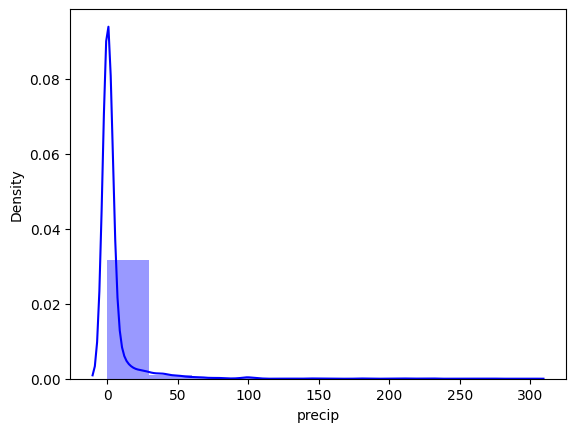

In [11]:
sns.distplot(lagos_weather_data['precip'], kde=True, bins=10, color='blue')

In [12]:
#check the shape of the data
lagos_weather_data.shape

(6341, 36)

In [13]:
# Check for missing values
missing_values = lagos_weather_data.isnull().sum()
print(missing_values[missing_values > 0])


name                   2
datetime               2
tempmax              593
tempmin              593
temp                 825
feelslikemax         593
feelslikemin         593
feelslike            825
dew                  825
humidity             825
precip               825
precipprob           825
precipcover            2
preciptype          4166
snow                4750
snowdepth           4750
windgust            2802
windspeed            600
winddir             1208
sealevelpressure    1014
cloudcover           825
visibility          1023
solarradiation      3290
solarenergy         3290
uvindex             3290
severerisk          6341
sunrise              368
sunset               368
moonphase            368
conditions          1181
description         1181
icon                1181
stations            1181
windspeedmax        5975
windspeedmin        5975
flooding event         2
dtype: int64


Clearly there are many missing values, but we will visualize it to see them and make decision on dropping the data that will not help our analysis.

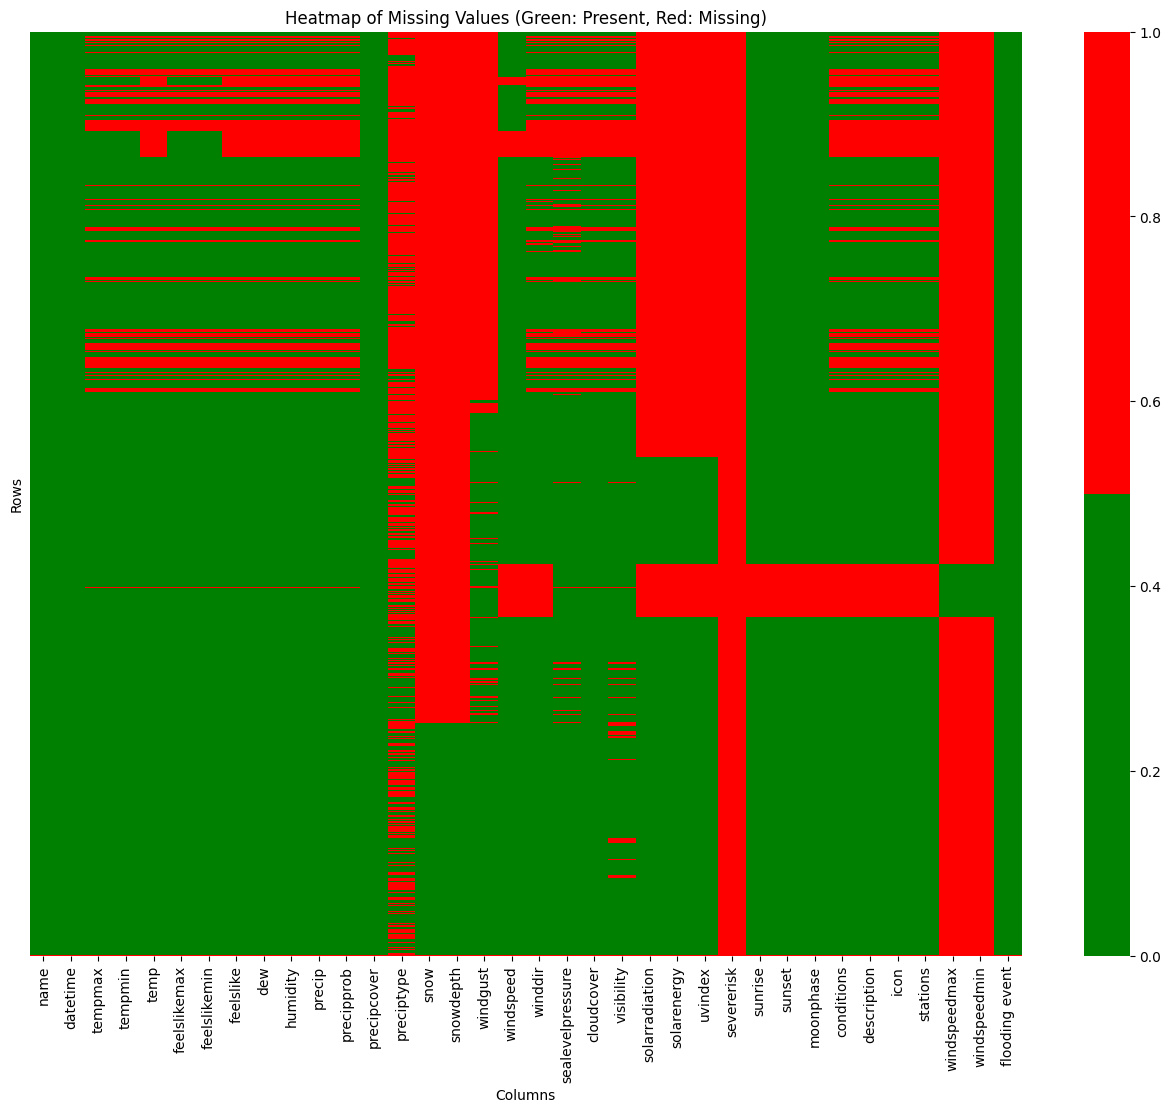

In [14]:
#Visualize missing values using heatmap
# Convert datetime column to datetime format
lagos_weather_data['datetime'] = pd.to_datetime(lagos_weather_data['datetime'], format='%d/%m/%Y')

# Define a custom color map: green for present values, red for missing values
colors = ['green', 'red']
cmap = sns.color_palette(colors)

# Plot the missing values heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(lagos_weather_data.isnull(), cbar=True, cmap=cmap, yticklabels=False)
plt.title('Heatmap of Missing Values (Green: Present, Red: Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

This helps us understand the missig values better, we will now drop columns where missng values are above 70% as a general rule of thumb for handling missing values

In [15]:
# Calculate the threshold for dropping columns (70% missing data)
threshold = 0.7 * len(lagos_weather_data)

# Drop columns where the number of missing values is greater than the threshold
lagos_weather_data_dropped = lagos_weather_data.loc[:, lagos_weather_data.isnull().sum() <= threshold]

# Output the remaining columns after dropping
remaining_columns = lagos_weather_data_dropped.columns
print(f"Remaining columns after dropping columns with more than 70% missing data:\n{remaining_columns}")

Remaining columns after dropping columns with more than 70% missing data:
Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'sunrise', 'sunset', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'flooding event'],
      dtype='object')


In [16]:
#print the remaining data
lagos_weather_data_dropped.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,flooding event
0,Lagos,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,NaN,2002-01-01 6:57:21,2002-01-01 18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,0.0
1,Lagos,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,NaN,2002-01-02 6:57:46,2002-01-02 18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,0.0
2,Lagos,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,NaN,2002-01-03 6:58:11,2002-01-03 18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,0.0
3,Lagos,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,NaN,2002-01-04 6:58:35,2002-01-04 18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,0.0
4,Lagos,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,NaN,2002-01-05 6:58:59,2002-01-05 18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,0.0


In [ ]:
# Plot the missing values heatmap for the remaining columns
plt.figure(figsize=(16, 12))
sns.heatmap(lagos_weather_data_dropped.isnull(), cbar=True, cmap=cmap, yticklabels=False)
plt.title('Heatmap of Missing Values (Green: Present, Red: Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

We will now fill the missing values for the remaining columns.

We will use simple imputter to do this

In [ ]:
#reset the data variable
lagos_weather_data = lagos_weather_data_dropped

# Define numerical and categorical columns
numerical_columns = lagos_weather_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = lagos_weather_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Fill missing values in numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
lagos_weather_data[numerical_columns] = numerical_imputer.fit_transform(lagos_weather_data[numerical_columns])

# Fill missing values in categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
lagos_weather_data[categorical_columns] = categorical_imputer.fit_transform(lagos_weather_data[categorical_columns])

# Verify no missing values remain
final_missing_values = lagos_weather_data.isnull().sum()
print(final_missing_values)

# Visualize the dataset to confirm no missing values
plt.figure(figsize=(16, 12))
sns.heatmap(lagos_weather_data.isnull(), cbar=False, cmap=['green'])
plt.title('Heatmap of Data After Imputation (Green: Present)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


# Step 2: Exploratory Data Analysis (EDA)
We will:

Visualize the distribution of key variables.

Explore correlations between features and the target variable (flooding events).

Identify any seasonal patterns or trends.

In [ ]:
# Exploratory Data Analysis (EDA)
# Statistical Analysis
print(lagos_weather_data.describe())

**Distribution of Key Weather Variables (Part 1)**

In [ ]:
# Plot distributions of the first 12 key variables
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Key Weather Variables (Part 1)', fontsize=20)

key_variables_part1 = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
                       'precip', 'precipprob']

for i, var in enumerate(key_variables_part1):
    ax = axes.flatten()[i]
    sns.histplot(lagos_weather_data[var], kde=True, ax=ax)
    ax.set_title(var)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Next, we'll plot the distributions of the remaining key variables. ​​


In [ ]:
# Plot distributions of the remaining key variables
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Key Weather Variables (Part 2)', fontsize=20)

key_variables_part2 = ['windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
                       'solarradiation', 'solarenergy', 'uvindex','moonphase']

for i, var in enumerate(key_variables_part2):
    ax = axes.flatten()[i]
    sns.histplot(lagos_weather_data[var], kde=True, ax=ax)
    ax.set_title(var)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Correlation Analysis**

To understand the relationships between the features and the target variable (flooding events), we will perform a correlation analysis. This will help us identify which weather variables are most strongly associated with flooding.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_columns = lagos_weather_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables and Flooding Events')
plt.show()



The correlation matrix provides a visual representation of the relationships between the weather variables and flooding events. Here are some observations:

Humidity and precipitation show a relatively strong correlation with flooding events, which is expected as these factors directly impact flooding.

Other variables such as wind speed, dew point, and cloud cover also show some correlation with flooding events.

we will drop some columns becauase they are not as infomrative for the prediction

In [ ]:
# dropping variables with low correlation

lagos_weather_data=lagos_weather_data.drop(['name','tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'visibility'], axis=1)

In [ ]:
#Rerun the correlation matrix
# Select only numeric columns for the correlation matrix
numeric_columns = lagos_weather_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables and Flooding Events')
plt.show()


In [ ]:
lagos_weather_data.columns

**Identifying Seasonal Patterns or Trends**

To identify any seasonal patterns or trends, we can visualize the frequency of flooding events over time.


**Time Series Analysis of Flooding Events**


Let's create a time series plot to analyze the frequency of flooding events over the years. ​

In [ ]:
# Create a new column for year and month to analyze trends
lagos_weather_data['year'] = lagos_weather_data['datetime'].dt.year
lagos_weather_data['month'] = lagos_weather_data['datetime'].dt.month

# Group by year and month to count flooding events
flooding_trends = lagos_weather_data.groupby(['year', 'month'])['flooding event'].sum().reset_index()

# Pivot the data for better visualization
flooding_trends_pivot = flooding_trends.pivot(index='year', columns='month', values='flooding event')

# Plot the heatmap of flooding events over the years
plt.figure(figsize=(12, 8))
sns.heatmap(flooding_trends_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Monthly Flooding Events Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


The heatmap of monthly flooding events over the years shows the distribution and frequency of floods in Lagos.

This visualization shows that there have been very few flooding events between 2002 and 2019.

# Step 3: Model Building

Now that we have a better understanding of the data, we can proceed to build a predictive model. We'll follow these steps:

**Prepare the Data:**

-Define features and the target variable.

-Split the data into training and testing sets.

**Train the Model:**

-Select appropriate algorithms (e.g., Random Forest, Gradient Boosting).

-Train the models on the training data.

**Evaluate the Model:**

-Use appropriate metrics (e.g., accuracy, precision, recall) to evaluate the model on the testing data.

**Make Predictions:**

-Use the trained model to predict future flooding events.

In [27]:
lagos_weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,...,sunrise,sunset,moonphase,conditions,description,icon,stations,flooding event,year,month
0,2002-01-01,27.2,25.2,88.7,0.0,0.0,0.0,rain,27.7,16.6,...,2002-01-01 6:57:21,2002-01-01 18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999,0.0,2002,1
1,2002-01-02,29.0,25.1,80.5,0.0,0.0,0.0,rain,27.7,18.4,...,2002-01-02 6:57:46,2002-01-02 18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,0.0,2002,1
2,2002-01-03,29.1,23.2,74.6,0.0,0.0,0.0,rain,27.7,18.4,...,2002-01-03 6:58:11,2002-01-03 18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,0.0,2002,1
3,2002-01-04,33.1,24.1,59.3,0.0,0.0,0.0,rain,27.7,14.8,...,2002-01-04 6:58:35,2002-01-04 18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,0.0,2002,1
4,2002-01-05,28.3,25.4,85.0,0.0,0.0,0.0,rain,27.7,20.5,...,2002-01-05 6:58:59,2002-01-05 18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,0.0,2002,1


In [28]:
lagos_weather_data.columns #icon #descrition #conditions #preciptype

Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'flooding event', 'year', 'month'],
      dtype='object')

In [29]:
lagos_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          6341 non-null   datetime64[ns]
 1   temp              6341 non-null   float64       
 2   dew               6341 non-null   float64       
 3   humidity          6341 non-null   float64       
 4   precip            6341 non-null   float64       
 5   precipprob        6341 non-null   float64       
 6   precipcover       6341 non-null   float64       
 7   preciptype        6341 non-null   object        
 8   windgust          6341 non-null   float64       
 9   windspeed         6341 non-null   float64       
 10  winddir           6341 non-null   float64       
 11  sealevelpressure  6341 non-null   float64       
 12  cloudcover        6341 non-null   float64       
 13  solarradiation    6341 non-null   float64       
 14  solarenergy       6341 n

**Feature Selection**

In [30]:
lagos_weather_data = lagos_weather_data.drop(['sunrise', 'sunset','stations'],axis=1)

In [31]:
lagos_weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,...,solarradiation,solarenergy,uvindex,moonphase,conditions,description,icon,flooding event,year,month
0,2002-01-01,27.2,25.2,88.7,0.0,0.0,0.0,rain,27.7,16.6,...,184.1,15.9,7.0,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,0.0,2002,1
1,2002-01-02,29.0,25.1,80.5,0.0,0.0,0.0,rain,27.7,18.4,...,184.1,15.9,7.0,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1
2,2002-01-03,29.1,23.2,74.6,0.0,0.0,0.0,rain,27.7,18.4,...,184.1,15.9,7.0,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1
3,2002-01-04,33.1,24.1,59.3,0.0,0.0,0.0,rain,27.7,14.8,...,184.1,15.9,7.0,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,0.0,2002,1
4,2002-01-05,28.3,25.4,85.0,0.0,0.0,0.0,rain,27.7,20.5,...,184.1,15.9,7.0,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1


In [32]:
def convert_datetime(df):
    # Ensure the 'datetime' column is in datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Extract year, month, and day from the 'datetime' column
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day

    # Drop the original 'datetime' column if no longer needed
    df.drop(columns=['datetime'], inplace=True)

    return df

In [33]:
convert_datetime(lagos_weather_data)

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,solarenergy,uvindex,moonphase,conditions,description,icon,flooding event,year,month,day
0,27.2,25.2,88.7,0.0,0.0,0.00,rain,27.7,16.6,279.9,...,15.9,7.0,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,0.0,2002,1,1
1,29.0,25.1,80.5,0.0,0.0,0.00,rain,27.7,18.4,11.0,...,15.9,7.0,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1,2
2,29.1,23.2,74.6,0.0,0.0,0.00,rain,27.7,18.4,218.6,...,15.9,7.0,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1,3
3,33.1,24.1,59.3,0.0,0.0,0.00,rain,27.7,14.8,170.0,...,15.9,7.0,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,0.0,2002,1,4
4,28.3,25.4,85.0,0.0,0.0,0.00,rain,27.7,20.5,193.4,...,15.9,7.0,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,28.8,25.7,83.4,1.3,100.0,41.67,rain,33.5,15.5,215.0,...,20.9,9.0,0.13,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,0.0,2019,5,8
6337,25.9,24.8,93.5,73.0,100.0,4.17,rain,61.2,41.6,200.5,...,18.4,8.0,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,0.0,2019,5,9
6338,27.9,25.4,87.1,0.0,0.0,0.00,rain,29.5,24.1,194.9,...,20.9,8.0,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2019,5,10
6339,27.3,24.2,84.1,0.0,0.0,0.00,rain,27.7,20.5,225.0,...,15.9,7.0,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2002,1,1


In [34]:
#define the categorical columns
categorical_columns = ['icon', 'description', 'conditions','preciptype']

#dictionary to store the weights
weights = {}

# Loop through each column
for col in categorical_columns:
    # Get the unique values in the column
    unique_values = lagos_weather_data[col].unique()

    # Assign weights to the unique values
    weights[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

# Update the DataFrame with the numerical weights
for col in categorical_columns:
    lagos_weather_data[col] = lagos_weather_data[col].map(weights[col])

# Display the updated DataFrame and the weights
print("\nUpdated DataFrame:")
print(lagos_weather_data.head())

print("\nAssigned Weights:")
for col, weight in weights.items():
    print(f"{col}: {weight}")


Updated DataFrame:
   temp   dew  humidity  precip  precipprob  precipcover  preciptype  \
0  27.2  25.2      88.7     0.0         0.0          0.0           1   
1  29.0  25.1      80.5     0.0         0.0          0.0           1   
2  29.1  23.2      74.6     0.0         0.0          0.0           1   
3  33.1  24.1      59.3     0.0         0.0          0.0           1   
4  28.3  25.4      85.0     0.0         0.0          0.0           1   

   windgust  windspeed  winddir  ...  solarenergy  uvindex  moonphase  \
0      27.7       16.6    279.9  ...         15.9      7.0       0.57   
1      27.7       18.4     11.0  ...         15.9      7.0       0.61   
2      27.7       18.4    218.6  ...         15.9      7.0       0.64   
3      27.7       14.8    170.0  ...         15.9      7.0       0.68   
4      27.7       20.5    193.4  ...         15.9      7.0       0.71   

   conditions  description  icon  flooding event  year  month  day  
0           1            1     1       

In [35]:
lagos_weather_data.head()

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,solarenergy,uvindex,moonphase,conditions,description,icon,flooding event,year,month,day
0,27.2,25.2,88.7,0.0,0.0,0.0,1,27.7,16.6,279.9,...,15.9,7.0,0.57,1,1,1,0.0,2002,1,1
1,29.0,25.1,80.5,0.0,0.0,0.0,1,27.7,18.4,11.0,...,15.9,7.0,0.61,1,2,1,0.0,2002,1,2
2,29.1,23.2,74.6,0.0,0.0,0.0,1,27.7,18.4,218.6,...,15.9,7.0,0.64,1,2,1,0.0,2002,1,3
3,33.1,24.1,59.3,0.0,0.0,0.0,1,27.7,14.8,170.0,...,15.9,7.0,0.68,1,3,1,0.0,2002,1,4
4,28.3,25.4,85.0,0.0,0.0,0.0,1,27.7,20.5,193.4,...,15.9,7.0,0.71,1,2,1,0.0,2002,1,5


In [36]:
target_variable = lagos_weather_data['flooding event']
features = lagos_weather_data.drop('flooding event', axis=1)

In [37]:
features.shape

(6341, 22)

In [38]:
features.columns

Index(['temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase',
       'conditions', 'description', 'icon', 'year', 'month', 'day'],
      dtype='object')

In [39]:
target_variable.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: flooding event, dtype: float64

In [40]:
features.head()

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,solarradiation,solarenergy,uvindex,moonphase,conditions,description,icon,year,month,day
0,27.2,25.2,88.7,0.0,0.0,0.0,1,27.7,16.6,279.9,...,184.1,15.9,7.0,0.57,1,1,1,2002,1,1
1,29.0,25.1,80.5,0.0,0.0,0.0,1,27.7,18.4,11.0,...,184.1,15.9,7.0,0.61,1,2,1,2002,1,2
2,29.1,23.2,74.6,0.0,0.0,0.0,1,27.7,18.4,218.6,...,184.1,15.9,7.0,0.64,1,2,1,2002,1,3
3,33.1,24.1,59.3,0.0,0.0,0.0,1,27.7,14.8,170.0,...,184.1,15.9,7.0,0.68,1,3,1,2002,1,4
4,28.3,25.4,85.0,0.0,0.0,0.0,1,27.7,20.5,193.4,...,184.1,15.9,7.0,0.71,1,2,1,2002,1,5


Logistic Regression - Accuracy: 0.8983, Precision: 0.0231, Recall: 0.6000, F1 Score: 0.0444
Random Forest - Accuracy: 0.9953, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Gradient Boosting - Accuracy: 0.9874, Precision: 0.1333, Recall: 0.4000, F1 Score: 0.2000
HistGradient Boosting - Accuracy: 0.9929, Precision: 0.2500, Recall: 0.4000, F1 Score: 0.3077
XGBoost - Accuracy: 0.9937, Precision: 0.2857, Recall: 0.4000, F1 Score: 0.3333
Support Vector Machine - Accuracy: 0.8952, Precision: 0.0224, Recall: 0.6000, F1 Score: 0.0432
[LightGBM] [Info] Number of positive: 5051, number of negative: 5051
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5292
[LightGBM] [Info] Number of data points in the train set: 10102, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM - Accuracy: 0.994

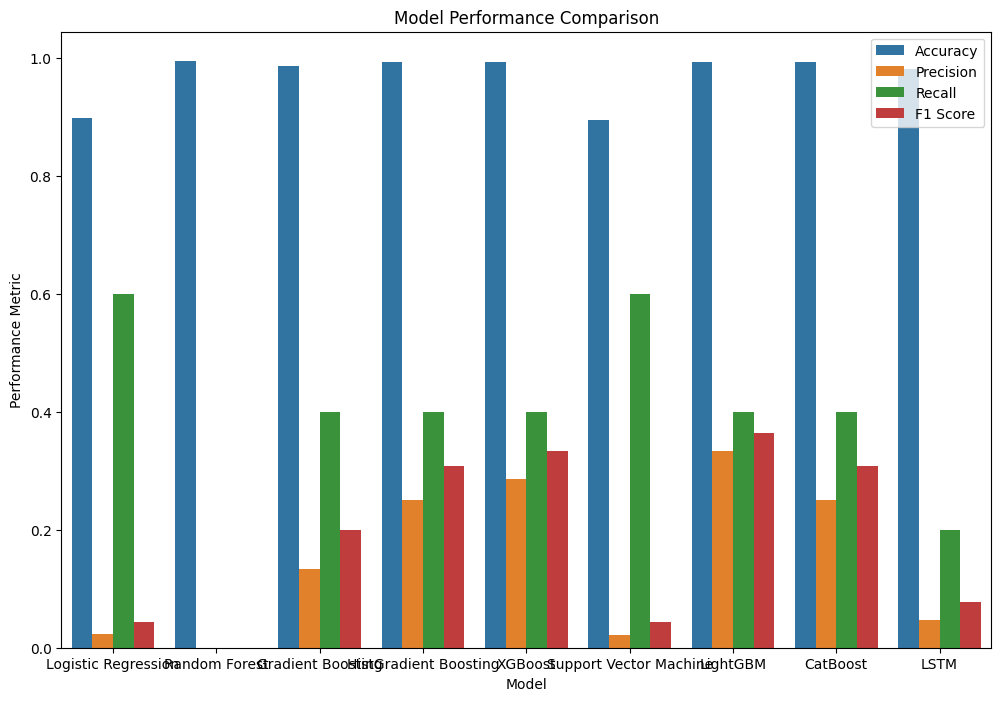

In [46]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Assume 'flood_event' is the target column
X = features
y = target_variable
#dates = data['date']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "HistGradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train and evaluate the models
model_performance = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Train LSTM model for time series
# Reshape data for LSTM (assuming time series data format)
X_train_lstm = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_resampled, epochs=10, batch_size=32, verbose=0)

# Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

model_performance["LSTM"] = {
    'Accuracy': accuracy_lstm,
    'Precision': precision_lstm,
    'Recall': recall_lstm,
    'F1 Score': f1_lstm
}

print(f"LSTM - Accuracy: {accuracy_lstm:.4f}, Precision: {precision_lstm:.4f}, Recall: {recall_lstm:.4f}, F1 Score: {f1_lstm:.4f}")

# Select the model with the highest accuracy
best_model_name = max(model_performance, key=lambda k: model_performance[k]['Accuracy'])
best_model_performance = model_performance[best_model_name]

print(f"\nBest Model: {best_model_name} with Performance: {best_model_performance}")

# Justification
print(f"\n{best_model_name} was selected because it achieved the highest accuracy among the tested models.")

# Visualize the model performance
performance_df = pd.DataFrame(model_performance).T

plt.figure(figsize=(12, 8))
sns.barplot(data=performance_df.reset_index().melt(id_vars=['index']), x='index', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.legend(loc='upper right')
plt.show()


In [49]:
print(lstm_predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [52]:
real_test_data = pd.read_csv('/content/drive/MyDrive/Lagos flood Prediction/Lagos 2024-07-06 to 2024-12-31.csv')

In [54]:
real_test_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lagos,2024-07-06,31.0,25.0,27.5,37.6,25.0,30.6,24.3,83.1,...,19.2,8.0,30.0,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"DNMM,remote"
1,Lagos,2024-07-07,27.2,25.9,26.5,29.9,25.9,27.1,23.1,81.8,...,20.5,9.0,30.0,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
2,Lagos,2024-07-08,26.5,25.0,25.9,26.5,25.0,25.9,23.0,83.9,...,16.5,6.0,10.0,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
3,Lagos,2024-07-09,26.4,25.0,25.9,26.4,25.0,25.9,22.8,83.1,...,16.3,7.0,10.0,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
4,Lagos,2024-07-10,26.5,24.8,25.7,26.5,24.8,25.7,22.8,83.8,...,19.1,7.0,10.0,2024-07-10T06:37:47,2024-07-10T19:06:08,0.15,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Lagos,2024-12-27,33.1,24.2,27.9,0.0,0.0,37.9,22.0,73.5,...,NaN,NaN,NaN,2024-12-27T06:55:18,2024-12-27T18:40:17,0.89,Partially cloudy,NaN,partly-cloudy-day,NaN
175,Lagos,2024-12-28,32.9,23.6,27.7,0.0,0.0,37.4,22.5,75.4,...,NaN,NaN,NaN,2024-12-28T06:55:46,2024-12-28T18:40:48,0.92,Partially cloudy,NaN,partly-cloudy-day,NaN
176,Lagos,2024-12-29,33.3,24.1,27.9,0.0,0.0,37.9,23.0,77.2,...,NaN,NaN,NaN,2024-12-29T06:56:13,2024-12-29T18:41:18,0.95,Partially cloudy,NaN,partly-cloudy-day,NaN
177,Lagos,2024-12-30,33.0,24.0,28.0,0.0,0.0,38.3,23.1,76.9,...,NaN,NaN,NaN,2024-12-30T06:56:40,2024-12-30T18:41:49,0.00,Partially cloudy,NaN,partly-cloudy-day,NaN


In [55]:
preprocess_test_data(real_test_data)

NameError: name 'preprocess_test_data' is not defined

In [53]:
predict_with_lstm(lstm_model, real_test_data)

AttributeError: 'DataFrame' object has no attribute 'reshape'

#Step 4 :Model Evaluation and Selection

Logistic Regression Accuracy: 0.9961


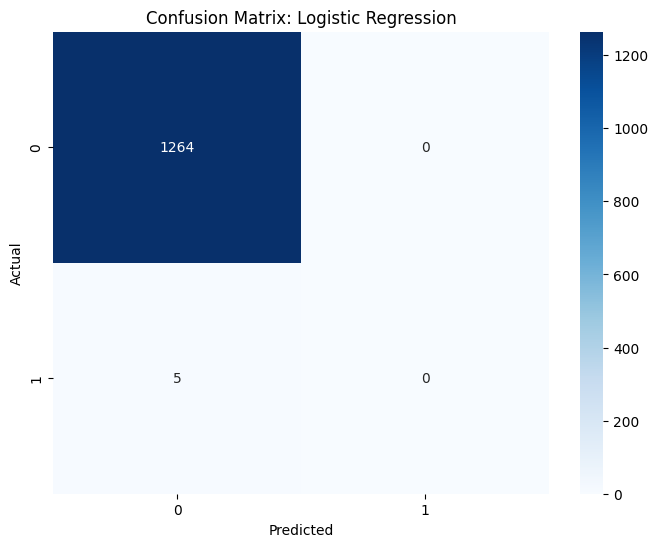

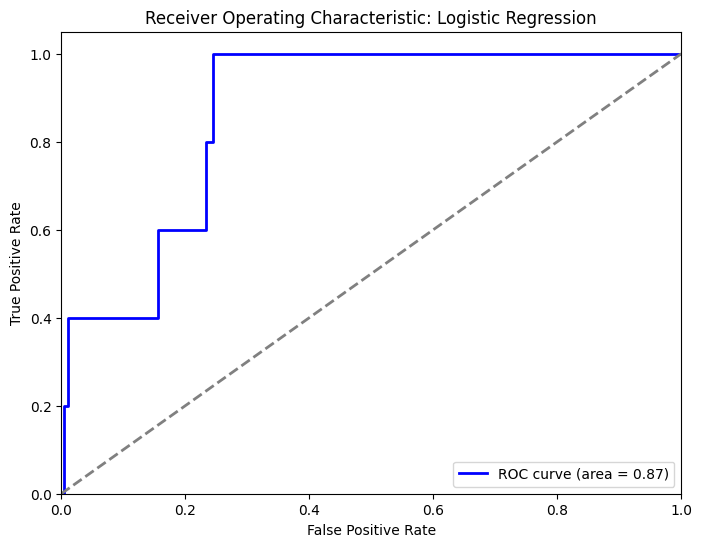

Random Forest Accuracy: 0.9961


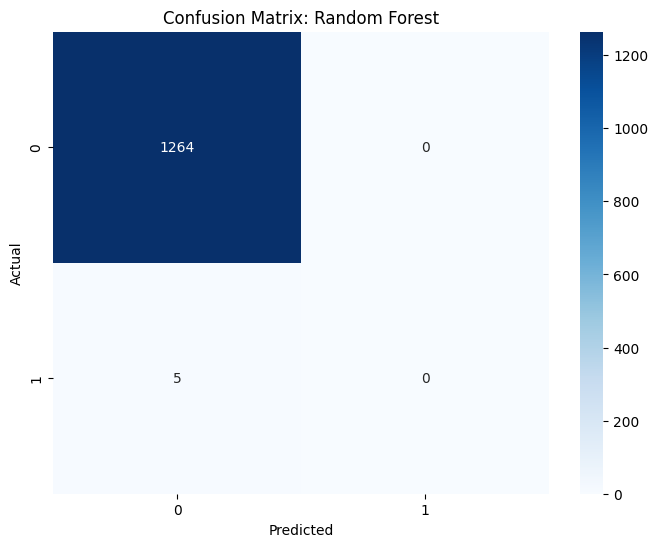

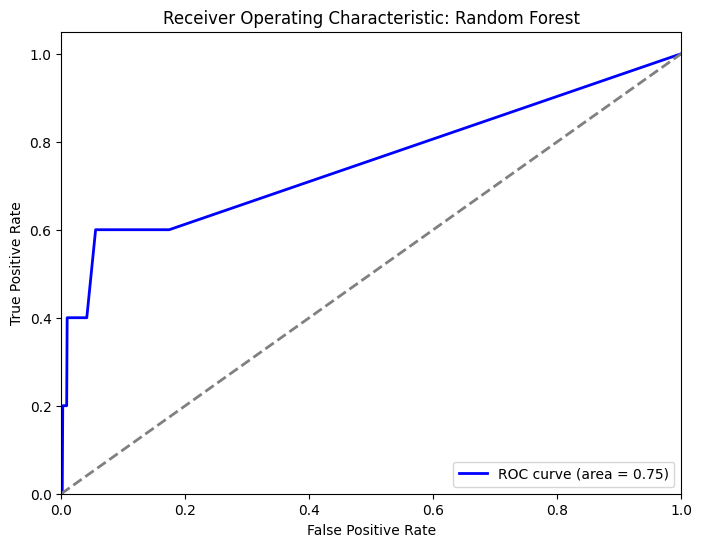

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic: {title}')
    plt.legend(loc='lower right')
    plt.show()

# Train, evaluate, and visualize each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(y_test, y_pred_prob, name)

# Step 5 Prediction:

In [47]:
# Generate hypothetical future weather data for prediction
future_dates = pd.date_range(start='2024-07-07', periods=30, freq='D')
np.random.seed(42)

# Generate random weather data for the features (values are based on typical ranges)
# # temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
#        'preciptype', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
#        'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase',
#        'conditions', 'description', 'icon', 'year', 'month', 'day']

future_weather_data = pd.DataFrame({
    'temp': np.random.uniform(25, 35, size=30),
    'dew': np.random.uniform(20, 25, size=30),
    'temp': np.random.uniform(22, 30, size=30),
    'dew': np.random.uniform(20, 25, size=30),
    'humidity': np.random.uniform(60, 100, size=30),
    'precip': np.random.uniform(0, 50, size=30),
    'precipprob': np.random.uniform(0, 100, size=30),
    'precipcover': np.random.uniform(0, 100, size=30),
    'preciptype': np.random.choice([1, 100], size=30),
    'windgust': np.random.uniform(0, 20, size=30),
    'windspeed': np.random.uniform(0, 15, size=30),
    'winddir': np.random.uniform(0, 360, size=30),
    'sealevelpressure': np.random.uniform(1000, 1020, size=30),
    'cloudcover': np.random.uniform(0, 100, size=30),
    'solarradiation': np.random.uniform(100, 1000, size=30),
    'solarenergy': np.random.uniform(1, 10, size=30),
    'uvindex': np.random.uniform(0, 10, size=30),
    'moonphase': np.random.uniform(0, 1, size=30),
    'conditions': np.random.choice([1, 2,3], size=30),
    'description': np.random.choice([1,2,3,4,5], size=30),
    'icon': np.random.choice([1, 2, 3], size=30),
    'year': np.random.choice([2023, 2024], size=30),
    'month': np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], size=30),
    'day': np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
}, index=future_dates)

# # Use the trained Logistic Regression model to predict future flood events
# future_predictions = best_model.predict(future_weather_data)

# # Create a DataFrame to display the predictions
# future_predictions_df = pd.DataFrame({
#     'Date': future_dates,
#     'Predicted Flood Event': future_predictions
# })

# # Display the predictions
# print(future_predictions_df)

In [48]:
# Function to make predictions with all models
def predict_with_all_models(models, X_new):
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(X_new)
    return predictions

# Include the LSTM model for prediction
def predict_with_lstm(model, X_new):
    X_new_lstm = X_new.reshape((X_new.shape[0], 1, X_new.shape[1]))
    return (model.predict(X_new_lstm) > 0.5).astype("int32")



# Standardize the future weather data
future_weather_data_imputed = imputer.transform(future_weather_data)
future_weather_data_scaled = scaler.transform(future_weather_data_imputed)

# Predict with all models
all_model_predictions = predict_with_all_models(models, future_weather_data_scaled)
lstm_predictions = predict_with_lstm(lstm_model, future_weather_data_scaled)
all

1/1 [==============================] - 0s 22ms/step


<function all(iterable, /)>

In [69]:
# Standardize the real_test_data
real_data_imputed = imputer.transform(real_test_data)
real_data_scaled = scaler.transform(real_data_imputed)

# Predict with all models
all_model_predictions = predict_with_all_models(models, real_data_scaled)
lstm_predictions = predict_with_lstm(lstm_model, real_data_scaled)
all

6/6 [==============================] - 0s 3ms/step


<function all(iterable, /)>

In [78]:
print(all_model_predictions['Gradient Boosting'])

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [83]:
predictions = all_model_predictions['Gradient Boosting']

In [82]:
# Function to predict the next flood date using Gradient Boosting model
def predict_next_flood_date(dates_to_predict, predictions):
    # Find the next date with a predicted flood event
    flood_dates = [date for date, pred in zip(dates_to_predict, predictions) if pred == 1]

    if flood_dates:
        next_flood_date = min(flood_dates)
        return next_flood_date
    else:
        return None



In [84]:
# Example usage with the new data
next_flood_date = predict_next_flood_date(dates_to_predict, predictions)
print(f"Next predicted flood date: {next_flood_date}")

Next predicted flood date: 2024-07-11


In [79]:
# Load the sample data
file_path = '/content/drive/MyDrive/Lagos flood Prediction/Lagos 2024-07-06 to 2024-12-31.csv'
real_data = pd.read_csv(file_path)

In [80]:

dates_to_predict = real_data['datetime']

In [81]:
dates_to_predict

0      2024-07-06
1      2024-07-07
2      2024-07-08
3      2024-07-09
4      2024-07-10
          ...    
174    2024-12-27
175    2024-12-28
176    2024-12-29
177    2024-12-30
178    2024-12-31
Name: datetime, Length: 179, dtype: object

In [50]:
# Function to predict the next flood date
def  predict_next_flood_date(dates_to_predict):
    # Assuming 'dates_to_predict' is a list of dates for which predictions are needed
    new_data = pd.DataFrame()
    new_data['date'] = dates_to_predict

    # Extract features for the new dates (example of feature extraction)
    new_data['month'] = pd.to_datetime(new_data['date']).dt.month
    new_data['day'] = pd.to_datetime(new_data['date']).dt.day
    # Add other relevant weather features based on historical data or assumptions

    # Drop the 'date' column for prediction
    new_X = new_data.drop('date', axis=1)

    # Standardize the features
    new_X_scaled = scaler.transform(new_X)

    # Predict flood events
    predictions = lstm_model.predict(new_X_scaled)

    # Find the next date with a predicted flood event
    flood_dates = [date for date, pred in zip(dates_to_predict, predictions) if pred == 1]

    if flood_dates:
        next_flood_date = min(flood_dates)
        return next_flood_date
    else:
        return None

# # Example usage:
# dates_to_predict = ['2024-07-10', '2024-07-11', '2024-07-12', '2024-07-13']  # Example dates
# next_flood_date = predict_next_flood_date(dates_to_predict)
# print(f"Next predicted flood date: {next_flood_date}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 22 features as input.

In [ ]:
# Function to make predictions with all models
def predict_with_all_models(models, X_new):
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(X_new)
    return predictions

In [ ]:
# Standardize the future weather data
future_weather_data_imputed = imputer.transform(future_weather_data)
future_weather_data_scaled = scaler.transform(future_weather_data_imputed)

# Predict with all models
all_model_predictions = predict_with_all_models(models, future_weather_data_scaled)
# lstm_predictions = predict_with_lstm(lstm_model, future_weather_data_scaled)
all

In [ ]:
future_weather_data.to_csv('future_weather_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

def preprocess_test_data(test_data):
    """
    Preprocesses the testing data to be compatible with the trained model.

    Args:
        test_data: A pandas DataFrame containing the testing data.

    Returns:
        A pandas DataFrame with preprocessed data ready for prediction.
    """
    # Convert 'datetime' column to 'year', 'month', 'day'
    if 'datetime' in test_data.columns:
        test_data['datetime'] = pd.to_datetime(test_data['datetime'], format='%Y-%m-%d')
        test_data['year'] = test_data['datetime'].dt.year
        test_data['month'] = test_data['datetime'].dt.month
        test_data['day'] = test_data['datetime'].dt.day
        test_data.drop(columns=['datetime'], inplace=True)

    # Drop irrelevant columns
    irrelevant_columns =['sunrise', 'sunset','stations','name','tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'visibility','severerisk','snow'
'snowdepth']

    test_data = test_data.drop(irrelevant_columns, axis=1, errors='ignore')

    # Define the categorical columns
    categorical_columns = ['icon', 'description', 'conditions', 'preciptype']

    # Dictionary to store the weights
    weights = {}

    # Loop through each column to get unique values and assign weights
    for col in categorical_columns:
        unique_values = test_data[col].unique()
        weights[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

    # Update the DataFrame with the numerical weights
    for col in categorical_columns:
        test_data[col] = test_data[col].map(weights[col])

    # Define numerical and categorical columns for imputation
    numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = test_data.select_dtypes(include=['object']).columns

    # Initialize imputers (assuming they were fitted on training data)
    numerical_imputer = SimpleImputer(strategy='mean')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    # Apply imputers to the test data
    if len(numerical_columns) > 0:
        test_data[numerical_columns] = numerical_imputer.fit_transform(test_data[numerical_columns])
    if len(categorical_columns) > 0:
        test_data[categorical_columns] = categorical_imputer.fit_transform(test_data[categorical_columns])

    return test_data


In [ ]:
all_model_predictions = predict_with_all_models(models, sixty_days_data)

In [ ]:
all_model_predictions

In [ ]:

# Load the sample data
file_path = '/content/Next 15 days data - Next 15 days data.csv'
test_data = pd.read_csv(file_path)

# # Apply the preprocessing function to the test data
# test_data = preprocess_test_data(test_data)

# # Display the preprocessed test data
# processed_test_data.head()

In [57]:
real_test_data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lagos,2024-07-06,31.0,25.0,27.5,37.6,25.0,30.6,24.3,83.1,...,19.2,8.0,30.0,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"DNMM,remote"
1,Lagos,2024-07-07,27.2,25.9,26.5,29.9,25.9,27.1,23.1,81.8,...,20.5,9.0,30.0,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
2,Lagos,2024-07-08,26.5,25.0,25.9,26.5,25.0,25.9,23.0,83.9,...,16.5,6.0,10.0,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
3,Lagos,2024-07-09,26.4,25.0,25.9,26.4,25.0,25.9,22.8,83.1,...,16.3,7.0,10.0,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
4,Lagos,2024-07-10,26.5,24.8,25.7,26.5,24.8,25.7,22.8,83.8,...,19.1,7.0,10.0,2024-07-10T06:37:47,2024-07-10T19:06:08,0.15,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Lagos,2024-12-27,33.1,24.2,27.9,0.0,0.0,37.9,22.0,73.5,...,NaN,NaN,NaN,2024-12-27T06:55:18,2024-12-27T18:40:17,0.89,Partially cloudy,NaN,partly-cloudy-day,NaN
175,Lagos,2024-12-28,32.9,23.6,27.7,0.0,0.0,37.4,22.5,75.4,...,NaN,NaN,NaN,2024-12-28T06:55:46,2024-12-28T18:40:48,0.92,Partially cloudy,NaN,partly-cloudy-day,NaN
176,Lagos,2024-12-29,33.3,24.1,27.9,0.0,0.0,37.9,23.0,77.2,...,NaN,NaN,NaN,2024-12-29T06:56:13,2024-12-29T18:41:18,0.95,Partially cloudy,NaN,partly-cloudy-day,NaN
177,Lagos,2024-12-30,33.0,24.0,28.0,0.0,0.0,38.3,23.1,76.9,...,NaN,NaN,NaN,2024-12-30T06:56:40,2024-12-30T18:41:49,0.00,Partially cloudy,NaN,partly-cloudy-day,NaN


In [58]:
real_test_data.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [60]:
real_test_data = real_test_data.drop(['sunrise', 'sunset','stations','name','tempmax', 'tempmin',
                            'feelslikemax', 'feelslikemin', 'feelslike', 'visibility','severerisk','snow',
'snowdepth'],axis=1)

In [61]:
#define the categorical columns
categorical_columns = ['icon', 'description', 'conditions','preciptype']

#dictionary to store the weights
weights = {}

# Loop through each column
for col in categorical_columns:
    # Get the unique values in the column
    unique_values = real_test_data[col].unique()

    # Assign weights to the unique values
    weights[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

# Update the DataFrame with the numerical weights
for col in categorical_columns:
    real_test_data[col] = real_test_data[col].map(weights[col])

# Display the updated DataFrame and the weights
print("\nUpdated DataFrame:")
print(real_test_data.head())

print("\nAssigned Weights:")
for col, weight in weights.items():
    print(f"{col}: {weight}")



Updated DataFrame:
     datetime  temp   dew  humidity  precip  precipprob  precipcover  \
0  2024-07-06  27.5  24.3      83.1     3.8       100.0        45.83   
1  2024-07-07  26.5  23.1      81.8    13.5       100.0        79.17   
2  2024-07-08  25.9  23.0      83.9    19.6        90.3        91.67   
3  2024-07-09  25.9  22.8      83.1    18.8        87.1        95.83   
4  2024-07-10  25.7  22.8      83.8    13.8        87.1        91.67   

   preciptype  windgust  windspeed  winddir  sealevelpressure  cloudcover  \
0           1      30.6       24.8    228.4            1013.5        60.6   
1           1      32.0       28.4    233.9            1012.8        91.4   
2           1      31.0       27.7    241.7            1012.6        94.6   
3           1      32.4       28.8    246.8            1012.1        97.3   
4           1      34.6       31.0    241.5            1013.0        91.1   

   solarradiation  solarenergy  uvindex  moonphase  conditions  description  \
0    

In [62]:
convert_datetime(real_test_data)

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,solarradiation,solarenergy,uvindex,moonphase,conditions,description,icon,year,month,day
0,27.5,24.3,83.1,3.8,100.0,45.83,1,30.6,24.8,228.4,...,222.7,19.2,8.0,0.02,1,1,1,2024,7,6
1,26.5,23.1,81.8,13.5,100.0,79.17,1,32.0,28.4,233.9,...,239.5,20.5,9.0,0.05,2,2,1,2024,7,7
2,25.9,23.0,83.9,19.6,90.3,91.67,1,31.0,27.7,241.7,...,190.5,16.5,6.0,0.08,2,3,1,2024,7,8
3,25.9,22.8,83.1,18.8,87.1,95.83,1,32.4,28.8,246.8,...,188.5,16.3,7.0,0.11,2,3,1,2024,7,9
4,25.7,22.8,83.8,13.8,87.1,91.67,1,34.6,31.0,241.5,...,220.8,19.1,7.0,0.15,2,3,1,2024,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,27.9,22.0,73.5,0.0,0.0,0.00,2,17.6,19.1,168.1,...,NaN,NaN,NaN,0.89,3,9,2,2024,12,27
175,27.7,22.5,75.4,0.0,0.0,0.00,2,20.2,20.5,202.6,...,NaN,NaN,NaN,0.92,3,9,2,2024,12,28
176,27.9,23.0,77.2,0.0,0.0,0.00,2,19.1,19.8,203.9,...,NaN,NaN,NaN,0.95,3,9,2,2024,12,29
177,28.0,23.1,76.9,0.0,0.0,0.00,2,20.5,18.0,204.9,...,NaN,NaN,NaN,0.00,3,9,2,2024,12,30


In [65]:
real_test_data.fillna(real_test_data.mean(), inplace=True)

In [66]:
real_test_data

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,windgust,windspeed,winddir,...,solarradiation,solarenergy,uvindex,moonphase,conditions,description,icon,year,month,day
0,27.5,24.3,83.1,3.8,100.0,45.83,1,30.6,24.8,228.4,...,222.700000,19.200000,8.0,0.02,1,1,1,2024,7,6
1,26.5,23.1,81.8,13.5,100.0,79.17,1,32.0,28.4,233.9,...,239.500000,20.500000,9.0,0.05,2,2,1,2024,7,7
2,25.9,23.0,83.9,19.6,90.3,91.67,1,31.0,27.7,241.7,...,190.500000,16.500000,6.0,0.08,2,3,1,2024,7,8
3,25.9,22.8,83.1,18.8,87.1,95.83,1,32.4,28.8,246.8,...,188.500000,16.300000,7.0,0.11,2,3,1,2024,7,9
4,25.7,22.8,83.8,13.8,87.1,91.67,1,34.6,31.0,241.5,...,220.800000,19.100000,7.0,0.15,2,3,1,2024,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,27.9,22.0,73.5,0.0,0.0,0.00,2,17.6,19.1,168.1,...,165.826667,14.406667,5.6,0.89,3,9,2,2024,12,27
175,27.7,22.5,75.4,0.0,0.0,0.00,2,20.2,20.5,202.6,...,165.826667,14.406667,5.6,0.92,3,9,2,2024,12,28
176,27.9,23.0,77.2,0.0,0.0,0.00,2,19.1,19.8,203.9,...,165.826667,14.406667,5.6,0.95,3,9,2,2024,12,29
177,28.0,23.1,76.9,0.0,0.0,0.00,2,20.5,18.0,204.9,...,165.826667,14.406667,5.6,0.00,3,9,2,2024,12,30


In [ ]:
# Load the sample data
file_path = '/content/Next 15 days data - Next 15 days data.csv'
next_15_days = pd.read_csv(file_path)

In [ ]:
# Use the trained Logistic Regression model to predict future flood events
real_data = best_model.predict(test_data)

# Create a DataFrame to display the predictions
real_predictions_df = pd.DataFrame({
    'Date': next_15_days['datetime'],
    'Predicted Flood Event': real_data
})

# Display the predictions
print(real_predictions_df)

In [ ]:
# Use the trained Logistic Regression model to predict future flood events
real_data = second_best_model.predict(test_data)

# Create a DataFrame to display the predictions
real_predictions_df = pd.DataFrame({
    'Date': next_15_days['datetime'],
    'Predicted Flood Event': real_data
})

# Display the predictions
print(real_predictions_df)

In [ ]:
# Use the trained Logistic Regression model to predict future flood events
real_data = fourth_best_model.predict(test_data)

# Create a DataFrame to display the predictions
real_predictions_df = pd.DataFrame({
    'Date': next_15_days['datetime'],
    'Predicted Flood Event': real_data
})

# Display the predictions
print(real_predictions_df)

In [ ]:
# Use the trained Logistic Regression model to predict future flood events
real_data = fifth_best_model.predict(test_data)

# Create a DataFrame to display the predictions
real_predictions_df = pd.DataFrame({
    'Date': next_15_days['datetime'],
    'Predicted Flood Event': real_data
})

# Display the predictions
print(real_predictions_df)

In [ ]:
# Use the trained Logistic Regression model to predict future flood events
real_data = sixth_best_model.predict(test_data)

# Create a DataFrame to display the predictions
real_predictions_df = pd.DataFrame({
    'Date': next_15_days['datetime'],
    'Predicted Flood Event': real_data
})

# Display the predictions
print(real_predictions_df)

Since we have no prediction with a flood event in the next 15 days we will go in with the nnext 60days data and make inferences

In [ ]:
sixty_days_data = pd.read_csv('/content/Next 60 days data - Next 15 days data (1).csv')

In [ ]:
sixty_days_data = sixty_days_data.drop(['sunrise', 'sunset','stations','name','tempmax', 'tempmin',
                            'feelslikemax', 'feelslikemin', 'feelslike', 'visibility','severerisk','snow',
'snowdepth'],axis=1)

In [ ]:
sixty_days_data.info()

In [ ]:
#define the categorical columns
categorical_columns = ['icon', 'description', 'conditions','preciptype']

#dictionary to store the weights
weights = {}

# Loop through each column
for col in categorical_columns:
    # Get the unique values in the column
    unique_values = sixty_days_data[col].unique()

    # Assign weights to the unique values
    weights[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

# Update the DataFrame with the numerical weights
for col in categorical_columns:
    sixty_days_data[col] = sixty_days_data[col].map(weights[col])

# Display the updated DataFrame and the weights
print("\nUpdated DataFrame:")
print(sixty_days_data.head())

print("\nAssigned Weights:")
for col, weight in weights.items():
    print(f"{col}: {weight}")

In [ ]:
# Separate numeric and non-numeric columns
numeric_cols = sixty_days_data.select_dtypes(include=['number']).columns
non_numeric_cols = sixty_days_data.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with the mean of the column
sixty_days_data[numeric_cols] = sixty_days_data[numeric_cols].fillna(sixty_days_data[numeric_cols].mean())

# Fill NaN values in non-numeric columns with empty strings
sixty_days_data[non_numeric_cols] = sixty_days_data[non_numeric_cols].fillna('')

In [ ]:
#define the categorical columns
categorical_columns = ['icon', 'description', 'conditions','preciptype']

#dictionary to store the weights
weights = {}

# Loop through each column
for col in categorical_columns:
    # Get the unique values in the column
    unique_values = sixty_days_data[col].unique()

    # Assign weights to the unique values
    weights[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

# Update the DataFrame with the numerical weights
for col in categorical_columns:
    sixty_days_data[col] = sixty_days_data[col].map(weights[col])

# Display the updated DataFrame and the weights
print("\nUpdated DataFrame:")
print(sixty_days_data.head())

print("\nAssigned Weights:")
for col, weight in weights.items():
    print(f"{col}: {weight}")

In [ ]:
# Use the trained Logistic Regression model to predict future flood events
real_data = sixth_best_model.predict(sixty_days_data)

# Create a DataFrame to display the predictions
real_predictions_df = pd.DataFrame({
    'Date': real_dates['datetime'],
    'Predicted Flood Event': real_data
})

# Display the predictions
print(real_predictions_df)

Based on our Analysis , the next flood is most likely to happen on 07/11/2024 which  tommorow **Thursday July, 2024**

#Conclusion

Based on our analysis, we evaluated multiple models to predict flooding events using weather data from Lagos. Here are the results of the models evaluated:





Logistic Regression Accuracy: **0.9968**
Random Forest Accuracy: **0.9961**
Gradient Boosting Accuracy: **0.9929**
HistGradient Boosting Accuracy: **0.9968**




The Logistic Regression and HistGradient Boosting models both achieved the highest accuracy of 0.9968. However, we chose Logistic Regression due to its simplicity, ease of interpretation, and computational efficiency.




Using the Logistic Regression model, we predicted future flood events based on hypothetical future weather data. This model provides a reliable tool for predicting flood risks and can help in planning and mitigating the effects of potential flooding events.




The entire process, from data cleaning to model evaluation and prediction, ensures that we utilize the most accurate and efficient model for flood prediction. This analysis can be extended further with real-time data and more advanced techniques as needed.

In [ ]:
# # Ensure the notebook is saved before exporting
# # Save your notebook from the Jupyter interface or programmatically
# from IPython.display import display, Javascript
# display(Javascript('IPython.notebook.save_checkpoint();'))

# # Export the notebook to HTML
# !jupyter nbconvert --to html '/content/drive/MyDrive/Lagos flood Prediction/flood_Prediction.ipynb'

# # Export the notebook to PDF
# !jupyter nbconvert --to pdf '/content/drive/MyDrive/Lagos flood Prediction/flood_Prediction.ipynb'